# Python ile Rassal Ağaç Kullanarak Tahmin
## **Decision Tree:** Veriyi koşullara göre dallara ayırarak adım adım karar veren bir makine öğrenimi modelidir. 🌳
# Ensemble (Topluluk) Yöntemleri: Birden fazla makine öğrenimi modelini bir araya getirerek, tek bir modelden daha güçlü ve daha doğru tahminler yapmayı amaçlayan yaklaşımlardır. 
## **Random Forest:** Birden fazla karar ağacının farklı veri ve özelliklerle eğitilip, birlikte oylama veya ortalama yaparak daha doğru ve kararlı tahminler üreten bir makine öğrenimi modelidir. 🌲🌲🌲

|Model |Esneklik |Outliner Dayanıklılığı |Karmaşık Veri Performansı|
|:-----|:----:|----:|----:|
|Linear Regression |Düşük |Düşük |Zayıf  |
|Polynomial Regression |Orta-Yüksek |Düşük |İyi ama overfit riski var |
|SVR(RBF) |Yüksek |Yüksek |Çok iyi|
|Decision Tree |Yüksek (ama parçalı) |Orta-Yüksek |İyi ama overfit yapabilir|
|Random Forest |Yüksek |Yüksek |Çok iyi (overfit önlenmiş)|

## **Decision Tree (Karar Ağacı):**
- Esneklik yüksek ama **"step function"** gibi çalışır (ani geçişler yapar).
- Outlier'a karşı daha dayanıklı çünkü **bölerek karar verir ama tek ağaç olduğu için aşırı öğrenmeye açık**.
- Karmaşık veride iyi performans gösterir ama her zaman genelleme yapamaz.

## **Random Forest:**
- Esneklik + Genelleme = çok güçlüdür.
- __Bagging sayesinde outlier'lara karşı daha dayanıklıdır.__
- Karmaşık çok yüksek boyutlu veri setlerinde çok iyi sonuç verir.
- Overfitting riski Random Forest ile büyük ölçüde azaltılır.

### SVR (Support Vector Regression): 
- Verilerin çoğunu belirli bir hata aralığında tutmaya çalışarak genel eğilimi tahmin eden dayanıklı bir regresyon modelidir.
- Veriye en iyi uyan çizgiyi, belirli bir hata toleransı (ε) içinde oluşturarak tahmin yapan, Support Vector Machine (SVM) algoritmasının regresyon versiyonudur.
- Amaç: Tahmin çizgisi veriye olabildiğince yakın olsun ama aşırı sapmalardan kaçınılsın.
- Outlier'lara dayanıklıdır. (yani uç değerlere karşı etkilenmez.)
- Linear veya non-linear kernel kullanılabilir (örneğin: RBF).

   Egitim Seviyesi
0                1
1                2
2                3
3                4
4                5
5                6
6                7
7                8
8                9
9               10
    maas
0   2250
1   2500
2   3000
3   4000
4   5500
5   7500
6  10000
7  15000
8  25000
9  50000
Bağımsız Değişken X değerleri:
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
Bağımsız Değişken X değerlerine 0.5 eklendiğinde:
 [[ 1.5]
 [ 2.5]
 [ 3.5]
 [ 4.5]
 [ 5.5]
 [ 6.5]
 [ 7.5]
 [ 8.5]
 [ 9.5]
 [10.5]]
Bağımsız Değişken X değerlerinden 0.4 çıkartıldığında:
 [[0.6]
 [1.6]
 [2.6]
 [3.6]
 [4.6]
 [5.6]
 [6.6]
 [7.6]
 [8.6]
 [9.6]]


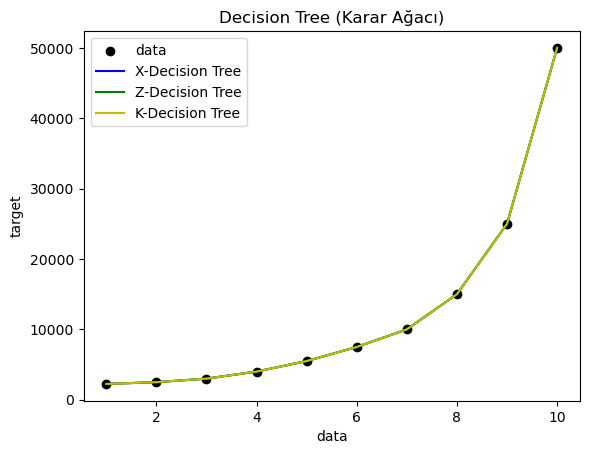

Decision Tree - 6.6 yıllık tecrübeye sahip birinin maaşı: [10000.]
Decision Tree - 11 yıllık tecrübeye sahip birinin maaşı: [50000.]


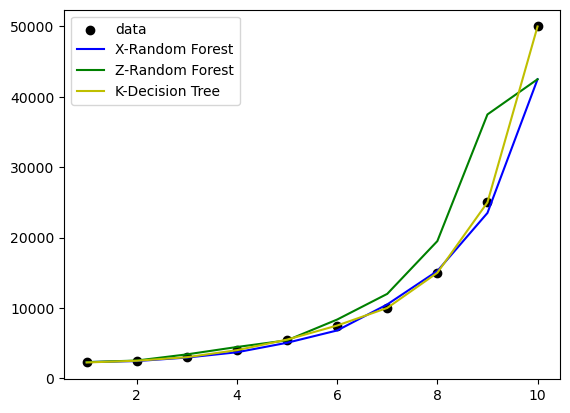

Random Forest - 6.6 yıllık tecrübeye sahip birinin maaş tahmini:[10500.]
Random Forest - 11 yıllık tecrübeye sahip birinin maaş tahmini:[42500.]


In [25]:
# MODEL KURULUM - GRAFİK - TAHMİN
# 1. Kütüphaneler
import numpy as np # matematiksel işlemler
import matplotlib.pyplot as plt # grafik çizimi
import pandas as pd # verileri CSV'den çekme ve DataFrame olarak işleme

# 2. Veri Yükleme
veriler = pd.read_csv('maaslar.csv')

# X = Bağımsız Değişken (Tecrübe), Y = Bağımlı Değişken (Maaş)
# x ve y DataFrame
x = veriler.iloc[:,1:2] # Tecrübe sütunu
y = veriler.iloc[:,2:] # Maaş sütunu
# X ve Y NumPy Array
X = x.values 
Y = y.values

print(x)
print(y)

# 3.🌳 Decision Tree Regressor
"""
- Bu model basamak basamak (stepwise) tahmin yapar
- Örn: 6.1 yıl, 6.2 yıl ve 6.3 yıl gibi değerlerin hepsine aynı tahmini verebilir.
"""
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)

# Tahmin 
"""
- Z ve K, verinin biraz sağından ve solundan alınarak "karar sınırlarını" göstermek için kullanılır. 
- Bu çizgiler sayesinde Decision Tree'nin "basamaklı" yapısı net görünür.
"""
print(f"Bağımsız Değişken X değerleri:\n {X}")
Z = X + 0.5
print(f"Bağımsız Değişken X değerlerine 0.5 eklendiğinde:\n {Z}")
K = X - 0.4
print(f"Bağımsız Değişken X değerlerinden 0.4 çıkartıldığında:\n {K}")
# Grafik
"""
plt.plot(X,r_dt.predict(X),color='blue') # Karar ağacının tahmini
plt.plot(x,r_dt.predict(Z), color='green') # Veri sağa kaydırıldığında tahminler
plt.plot(x,r_dt.predict(K), color='yellow') # Veri sola kaydırıldığında tahminler
"""
plt.scatter(X,Y,c='k', label='data') # Gerçek veriler
plt.plot(X, r_dt.predict(X), c='b', label='X-Decision Tree')
plt.plot(X, r_dt.predict(Z), c='g', label='Z-Decision Tree')
plt.plot(X, r_dt.predict(K), c='y', label='K-Decision Tree')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree (Karar Ağacı)')
plt.legend()
plt.show()
print(f"Decision Tree - 6.6 yıllık tecrübeye sahip birinin maaşı: {r_dt.predict([[6.6]])}") #10.000
print(f"Decision Tree - 11 yıllık tecrübeye sahip birinin maaşı: {r_dt.predict([[11]])}") #50.000

# 4. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# n_estimators = çizilecek decision tree sayısı
rf_reg = RandomForestRegressor(n_estimators = 10, random_state=0)
rf_reg.fit(X,Y.ravel()) # Y.ravel(): 2D array olan Y'yi 1D'ye çeviriyor.
# Her ağaç kendi verisinden ve özelliklerinden öğrenir.
# Sonuçta ağaçların tahminleri ortalama alınarak final karar verilir.

# Grafik (Random Forest)
plt.scatter(X,Y,c='k', label='data') # Gerçek Veriler
plt.plot(X,rf_reg.predict(X),c='b', label='X-Random Forest') # RF tahmini
plt.plot(X,rf_reg.predict(Z),c='g', label='Z-Random Forest') # Sağa kaydırılmış veriye RF tahmini
plt.plot(X,r_dt.predict(K),c='y', label='K-Decision Tree') # Decision Tree tahmini, random forest'dan farklı olduğunu göstermek amacıyla eklendi.
plt.legend()
plt.show()
print(f"Random Forest - 6.6 yıllık tecrübeye sahip birinin maaş tahmini:{rf_reg.predict([[6.6]])}") # 10.500
print(f"Random Forest - 11 yıllık tecrübeye sahip birinin maaş tahmini:{rf_reg.predict([[11]])}") # 42.500

# Decision Tree Regressor
- Mavi çizgi aslında görünmüyor çünkü yeşil ve mavi çok yakın. Yani model, orijinal verilere çok iyi "yapışmış".

- Bu grafik, Decision Tree'nin "kesikli (stepwise)" doğasını gösteriyor.

- Tahmin çizgileri düz çizgi şeklinde basamak basamak ilerliyor (çünkü karar ağacı her aralık için sabit tahmin yapıyor).

# Random Forest Regressor
- **Kodun amacı karar ağaçlarının tahmin yapısını ve rastgele ormanların bu tahminleri nasıl iyileştirdiğini göstermek.**
- **Random Forest sahada gerçek projelerde daha başarılıdır.**
- **Çünkü decision tree bilinen verileri bire bir tahmin eder, ancak bilmediğimiz verilere geçtiğimizde bildiği verilerle aynı sonuçları döndürme eğilimine sahip. Veriler üzerinde kutulama yapar. Random forest ise her bir veri için yeni orijinal farklı bir değer döndürme kapasitesine sahip. İlla ki döndürecek diye bir kural yok ama döndürebilir.**
# Ensemble Learning - Kollektif Öğrenme
|Yöntem |Açıklama |
|:-----|:----:|
|Bagging |Veriyi rastgele alt kümelere ayırıp her modelde ayrı ayrı eğitmek (Örnek: Random Forest) |
|Boosting |Her model bir öncekinde yapılan hataları düzeltmeye çalışır (Örnek: XGBoost, AdaBoost) |
|Stacking |Birden fazla modelin çıktısı, başka bir modelle birleştirilir (Meta model kullanılır) |